## Importing pandas library to read CSV data file

In [1]:
#Importing pandas library to read CSV data file
import pandas as pd

## Reading data

In [15]:
dataset = pd.read_csv('Bank_Data.csv')
dataset

,AGE,HOME,INCOME,GENDER,HOUSEHOLD_N,CREDIT_LINES_N,DEAFULTED
0,23,R,2,M,3,2,1
1,43,R,3,F,2,2,1
2,63,R,7,M,3,3,0
3,46,H,7,F,4,4,0
4,55,H,7,F,3,4,0
...,...,...,...,...,...,...,...
1095,24,R,5,F,5,4,1
1096,44,H,5,M,3,3,0
1097,67,H,5,F,1,1,0
1098,35,R,6,F,3,0,1


In [16]:
import dtale

dtale.show(dataset)

In [17]:
#Data Overview
dataset.describe(include='all')

,AGE,HOME,INCOME,GENDER,HOUSEHOLD_N,CREDIT_LINES_N,DEAFULTED
count,1100.000000,1100,1100.000000,1100,1100.000000,1100.000000,1100.000000
unique,NaN,2,NaN,2,NaN,NaN,NaN
top,NaN,H,NaN,F,NaN,NaN,NaN
freq,NaN,735,NaN,647,NaN,NaN,NaN
mean,50.397273,NaN,4.434545,NaN,3.137273,2.452727,0.410909
std,13.246229,NaN,1.465492,NaN,1.205942,1.785734,0.492223
min,3.000000,NaN,2.000000,NaN,1.000000,0.000000,0.000000
25%,43.000000,NaN,3.000000,NaN,2.000000,1.000000,0.000000
50%,52.000000,NaN,4.000000,NaN,3.000000,2.000000,0.000000
75%,62.000000,NaN,5.000000,NaN,4.000000,4.000000,1.000000


In [18]:
#Determine the count number of value in Exited column
dataset['DEAFULTED'].value_counts()

DEAFULTED
0    648
1    452
Name: count, dtype: int64

<Axes: xlabel='DEAFULTED'>

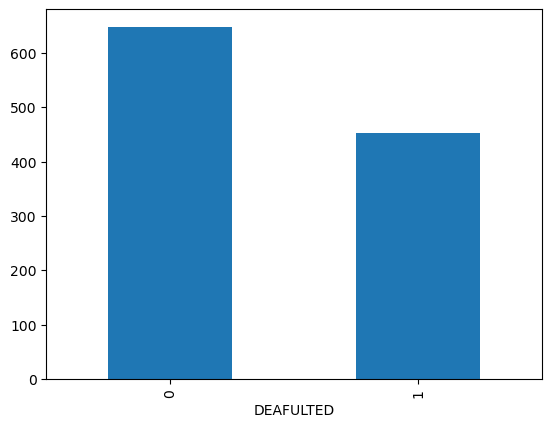

In [19]:
#Plot Bar Chart for Output Classes
dataset['DEAFULTED'].value_counts().plot(kind='bar')

## Dividing dataset into X and y

In [20]:
#Dividing dataset into X and y
X = dataset.iloc[:, [0,2,4,5]].values
y = dataset.iloc[:, -1].values

In [21]:
X

array([[23,  2,  3,  2],
       [43,  3,  2,  2],
       [63,  7,  3,  3],
       ...,
       [67,  5,  1,  1],
       [35,  6,  3,  0],
       [34,  5,  3,  1]], dtype=int64)

## Importing train_test_split from sklearn.model_selection to split data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [23]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)

X_train

array([[-0.26932737, -0.9811246 , -1.78905169,  0.2730212 ],
       [ 1.09671345, -0.30075451, -0.95781331, -0.84186815],
       [-1.2559124 ,  0.37961559,  1.53590182,  0.83046587],
       ...,
       [ 0.4895842 ,  1.05998568, -0.12657493, -1.39931282],
       [ 0.18601957,  1.05998568, -0.12657493, -1.39931282],
       [ 0.26191073,  0.37961559, -0.95781331, -0.84186815]])

## Importing and Fitting Random Forest Classification to Training set

In [24]:
#Importing and Fitting Random Forest Classification to Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'gini', min_samples_leaf=5, random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=15, random_state=0)

In [25]:
from sklearn.metrics import accuracy_score

RF = classifier.predict(X_test)
accuracy_score(y_test, RF)

0.7818181818181819

## Importing and Fitting Adaboost Classification to Training set

In [26]:
from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, algorithm='SAMME.R')
Ada.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.8, n_estimators=100)

In [27]:
AdaB = Ada.predict(X_test)
accuracy_score(y_test, AdaB)

0.7954545454545454